In [2]:
import pandas as pd
import matplotlib as mpl
from pylab import *
import seaborn as sns

In [3]:
# 0) Описание датафрейма

<h2>DataFrame nba.csv</h2>
<p>DataFrame содержит информацию о игроках:</p>
<h3>Описание столбцов:</h3>
<p>Name:</p>
<p>Имя игрока, тип данных текстовый</p>
<p>Team:</p>
<p>Команда, тип данных текстовый</p>
<p>Number</p>
<p>Номер игрока, тип данных числовой</p>
<p>Position:</p>
<p>Позиция игрока, тип данных текстовый</p>
<p>Age:</p>
<p>Возраст игрока, тип данных числовой</p>
<p>Height</p>
<p>Рост игрока,тип данных числовой</p>
<p>Weight:</p>
<p>Вес игрока, тип данных числовой</p>
<p>College:</p>
<p>Колледж игрока, тип данных текстовый</p>
<p>Salary:</p>
<p>Зарплата игрока, тип данных числовой</p>

In [4]:
df = pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


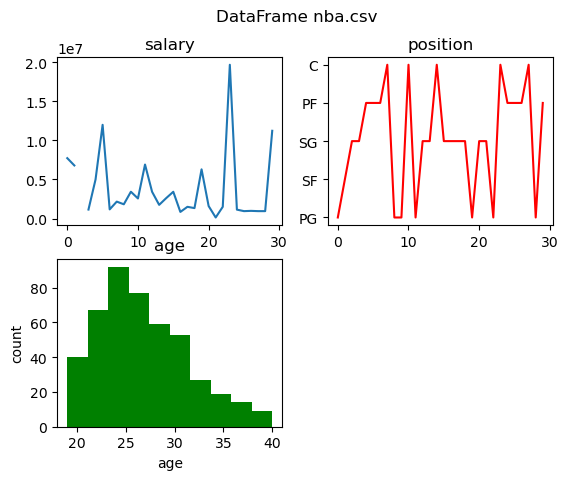

In [16]:
# 1.1) Построить любой график (любого рода) с помощью чистого matplotlib / pylab
# 1.2) Построить несколько суб-графиков на одном графике используя .subplot.
# Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. 
# Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.
df = pd.read_csv('nba.csv')
salary = list(df['Salary'])
age = list(df['Age'])
position = list(df['Position'])
plt.suptitle("DataFrame nba.csv")

plt.subplot(2, 2, 1)
plt.title("salary")
plt.plot(salary[:30])

plt.subplot(2, 2, 2)
plt.title("position")
plt.plot(position[:30],color='r')

plt.subplot(2, 2, 3)
plt.title("age")
plt.xlabel("age")
plt.ylabel("count")
plt.hist(age,color='g')

plt.show()

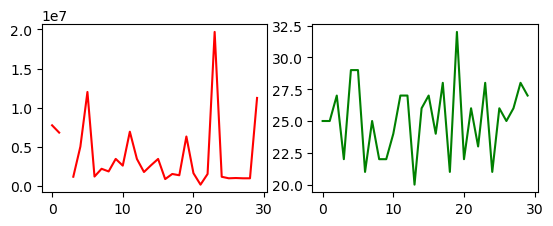

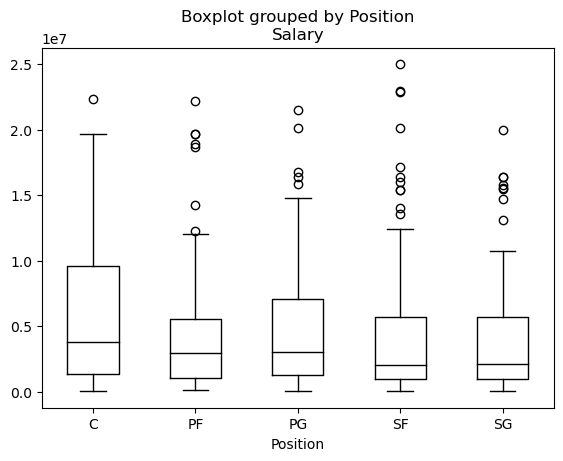

In [19]:
# 2) На основе Вашего датасета построить три разных вида графиков используя 
# pandas.DataFrame.plot / Series.plot (мануал) 
# Среди графиков должен присутствовать один boxplot 
# (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). 
# Графики должны быть построены как через методы DataFrame, так и через методы Series. 
# То есть оба варианта нужно продемонстрировать.

# pandas.DataFrame.plot
df = pd.read_csv('nba.csv')
plt.subplot(2, 2, 1)
df["Salary"][:30].plot(color='r')


# Series.plot
plt.subplot(2, 2, 2)
age_list = list(df['Age'])
a = pd.Series(age_list)[:30]
a.plot(color='g')

# boxplot
df.boxplot(by ='Position', column=['Salary'], grid= False , color='black')

plt.show()

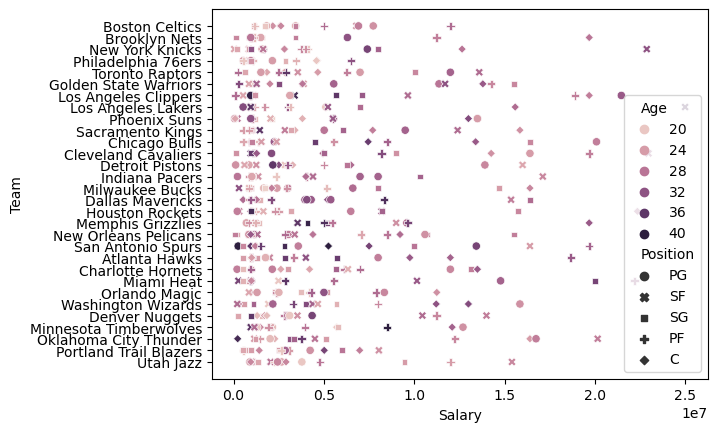

In [43]:
# 3) Seaborn
# 3.1) Построить .pairplot с помощью seaborn на каком-либо наборе данных, 
# проанализировав взаимосвязь набора числовых переменных
nba = pd.read_csv('nba.csv')
sns.scatterplot(x='Salary', y='Team', data=tips, hue='Age', style='Position')
plt.show()

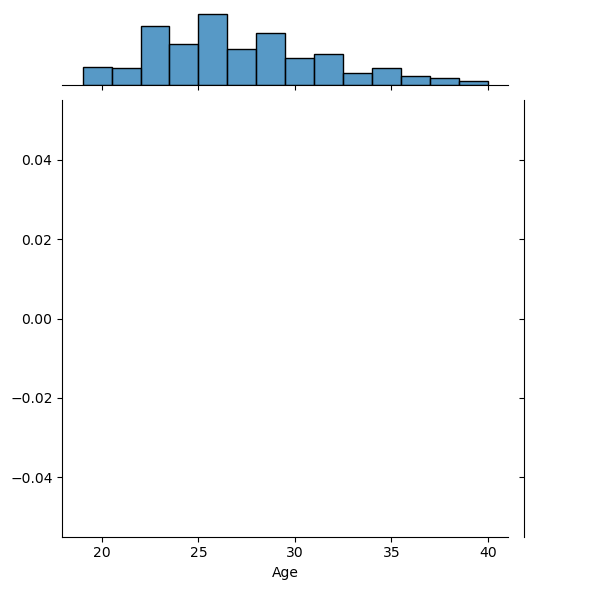

In [47]:
# 3.2) Построить .jointplot
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
nba = pd.read_csv('nba.csv')
sns.jointplot(df['Age'])
plt.show()

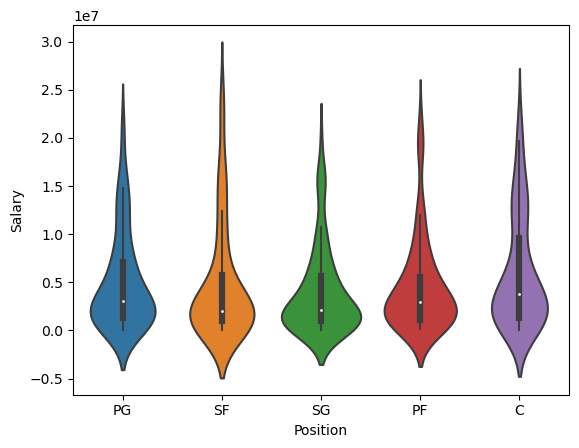

In [27]:
# 3.3) Построить .boxplot или .violinplot на каком-либо наборе данных, 
# проанализировав какой-то числовой показатель в разрезе категориального
df = pd.read_csv('nba.csv')
Salary = df.Salary
Position = df.Position
sns.violinplot(x=Position, y=Salary, data=df)
plt.show()

<AxesSubplot:>

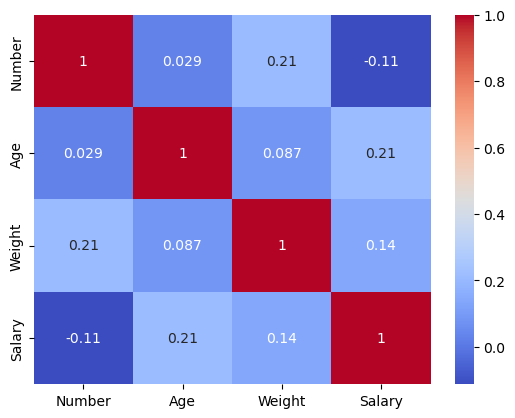

In [23]:
# 3.4) Построить график heatmap попарной корреляции всех числовых признаков 
# (категориальные признаки убираете из графика)
nba = pd.read_csv("nba.csv")


numeric_features = nba.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")